# MC vs background variables

To create the background sample, I've applied the following cut: $5400\ MeV/c^2 < m(D^*3\pi|m(D^*)=m(D^*)_{PDG}) < 5570\ MeV/c^2$.
However, I fitted the range: $5400\ MeV/c^2 < m(D^*3\pi|m(D^*)=m(D^*)_{PDG}) < 5545\ MeV/c^2$

The goal is to compare the variables used in the training for the following ranges:
- $5400\ MeV/c^2 < m(D^*3\pi|m(D^*)=m(D^*)_{PDG}) < 5545\ MeV/c^2$
- $5545\ MeV/c^2 < m(D^*3\pi|m(D^*)=m(D^*)_{PDG}) < 5570\ MeV/c^2$

In [9]:
low_bkg1 = 5400
high_bkg1 = 5545

In [10]:
low_bkg2 = 5545
high_bkg2 = 5570

In [2]:
name_BDT = 'gradient_test'


var = 'Dst_constr_B0_M'

In [3]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import matplotlib.pyplot as plt

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, save_dataframe, save_json, get_real_vars, get_needed_vars, get_df_variables, add_constr_Dst
import plot.histogram as h
from plot.tool import save_file
import BDT.BDT as bt

Welcome to JupyROOT 6.22/02


## Load data

### Training variables

In [4]:
variables_functions = [
    ('B0_DIRA_OWNPV', 'ln(1-x)'),
    (('B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF'), 'x/y'),
    'B0_PT',
    ('B0_FDCHI2_OWNPV', 'ln(x)'),
    'B0_IP_OWNPV', # much better with it
#     'B0_FD_OWNPV',

    ('Dst_DIRA_OWNPV', 'ln(1-x)'), # better with it
    'Dst_PT',
#     'Dst_FDCHI2_OWNPV', # worse with it
    'Dst_IPCHI2_OWNPV',
    'Dst_IP_OWNPV',
#     'Dst_FD_OWNPV', # different for sWeighted and MC

#     ('D0_DIRA_OWNPV', 'ln(1-x)'), # worst with it # different for sWeighted and MC
#     (('D0_ENDVERTEX_CHI2', 'D0_ENDVERTEX_NDOF'), 'x/y'),
    'D0_PT',
    ('D0_FDCHI2_OWNPV', 'ln(x)'),
    ('D0_IPCHI2_OWNPV', 'ln(x)'),
    'D0_IP_OWNPV',
#     'D0_FD_OWNPV', # different for sWeighted and MC

#     ('tau_DIRA_OWNPV', 'ln(1-x)'), # different for sWeighted and MC
    (('tau_ENDVERTEX_CHI2', 'tau_ENDVERTEX_NDOF'), 'x/y'), # a bit worse without it 
    'tau_PT',
    ('tau_FDCHI2_OWNPV', 'ln(x)'),
    ('tau_IPCHI2_OWNPV', 'ln(x)'),
    'tau_IP_OWNPV',
#     'tau_FD_OWNPV', # better without it # different for sWeighted and MC

    'Dst_pion_PT',
    ('Dst_pion_IPCHI2_OWNPV', 'ln(x)'),

    'D0_kaon_PT',
    ('D0_kaon_IPCHI2_OWNPV', 'ln(x)'),

    'D0_pion_PT', # better with it
    ('D0_pion_IPCHI2_OWNPV', 'ln(x)'),
       
#     'B0_ETA', # different for sWeighted and MC
#     'Dst_ETA', # different for sWeighted and MC
#     'D0_ETA', # different for sWeighted and MC
#     'tau_ETA', # different for sWeighted and MC
#     'Dst_pion_ETA', # different for sWeighted and MC
#     'D0_kaon_ETA', # different for sWeighted and MC
#     'D0_pion_ETA', # different for sWeighted and MC
]

needed_variables = get_needed_vars(variables_functions)
variables = get_real_vars(variables_functions)

    
add_variables = ['B0_M', 'tau_M', 'Dst_M', 'D0_M']

### Load dataframes

In [5]:
df = {}
df['common'] = load_data(years,magnets,type_data = 'common'  ,vars = needed_variables+add_variables, cut_DeltaM=True, cut_PIDK=None)
df['common'] = add_constr_Dst(df['common'])
add_variables += [var]

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events


### Dataframes with the training variables

In [7]:
df['training_common'] = get_df_variables(df['common'], variables_functions + add_variables)

In [11]:
df['bkg1'] = df['training_common'].query(f'{var} > {low_bkg1} and {var} <{high_bkg1}')
df['bkg2'] = df['training_common'].query(f'{var} > {low_bkg2} and {var} <{high_bkg2}')

In [12]:
print(variables)

['B0_DIRA_OWNPV:ln(1-x)', 'B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y', 'B0_PT', 'B0_FDCHI2_OWNPV:ln(x)', 'B0_IP_OWNPV', 'Dst_DIRA_OWNPV:ln(1-x)', 'Dst_PT', 'Dst_IPCHI2_OWNPV', 'Dst_IP_OWNPV', 'D0_PT', 'D0_FDCHI2_OWNPV:ln(x)', 'D0_IPCHI2_OWNPV:ln(x)', 'D0_IP_OWNPV', 'tau_ENDVERTEX_CHI2,tau_ENDVERTEX_NDOF:x/y', 'tau_PT', 'tau_FDCHI2_OWNPV:ln(x)', 'tau_IPCHI2_OWNPV:ln(x)', 'tau_IP_OWNPV', 'Dst_pion_PT', 'Dst_pion_IPCHI2_OWNPV:ln(x)', 'D0_kaon_PT', 'D0_kaon_IPCHI2_OWNPV:ln(x)', 'D0_pion_PT', 'D0_pion_IPCHI2_OWNPV:ln(x)']


In [13]:
for var in add_variables:
    for data in 'bkg1', 'bkg2':
        try:
            df[data] = df[data].drop(var, 1)
        except KeyError:
            pass
    

## Compare MC and background data

### Range of the variables

In [14]:
range_dic = {
    'B0_PT': [0,35000],
    'Dst_PT':[0,30000],
    'tau_PT':[0,18000],
    'Dst_pion_PT':[0,2300],
    'Dst_kaon_PT':[0,2300],
    'D0_pion_PT':[0,20000],
    'D0_kaon_PT':[0,20000],
    'D0_PT':[0,3000],
    'B0_ENDVERTEX_CHI2':[0,60],
    'tau_ENDVERTEX_CHI2':[None,None],
    'B0_OWNPV_CHI2':[None,None],    
    'B0_FDCHI2_OWNPV':[0, 13000], 
    'B0_DIRA_OWNPV':[0.99996, 1], 
    'Dst_IPCHI2_OWNPV':[0, 2000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_pion_IPCHI2_OWNPV':[0, 20000], 
    'pion_IPCHI2_OWNPV':[0, 2000], 
    'tau_FDCHI2_OWNPV':[0, 200000], 
    'tau_FD_OWNPV':[0, 500], 
    'tau_pion0_TRACK_CHI2NDOF':[None,None], 
    'tau_pion1_TRACK_CHI2NDOF':[None,None], 
    'tau_pion2_TRACK_CHI2NDOF':[None,None],
    'D0_ENDVERTEX_CHI2,D0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_IP_OWNPV':[0, 0.1], 
    'D0_IP_OWNPV':[0, 2], 
    'Dst_IP_OWNPV':[0, 2], 
    'tau_IP_OWNPV':[0, 4], 
    'B0_FD_OWNPV':[0, 100], 
    'Dst_FD_OWNPV':[0, 200], 
    'tau_FD_OWNPV':[0, 150], 
    'D0_FD_OWNPV':[0, 200],
    "Dst_FDCHI2_OWNPV":[-1000, 20000],
}

### Plots

=====================  B0_DIRA_OWNPV:ln(1-x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/B0_DIRA_OWNPV:ln(1-x)_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570
=====================  B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:xdy_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570
=====================  B0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/B0_PT_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570
=====================  B0_FDCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/B0_FDCHI2_OWNPV:ln(x)_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:228: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/D0_kaon_PT_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570
=====================  D0_kaon_IPCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/D0_kaon_IPCHI2_OWNPV:ln(x)_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570
=====================  D0_pion_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/D0_pion_PT_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570
=====================  D0_pion_IPCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient_test/variables/D0_pion_IPCHI2_OWNPV:ln(x)_5400_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5545_5545_<_m(D^*3\pi|m(D^*)=m(D^*)_{PDG})_<_5570


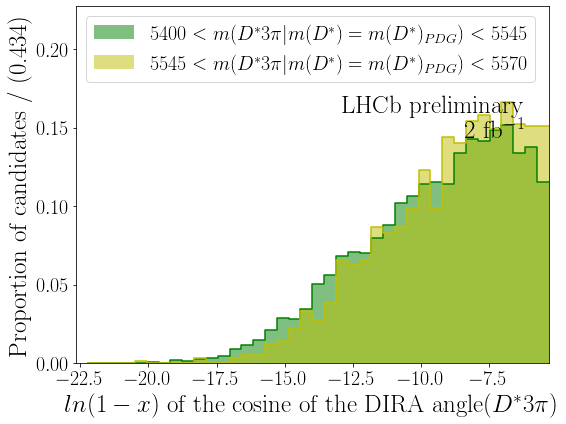

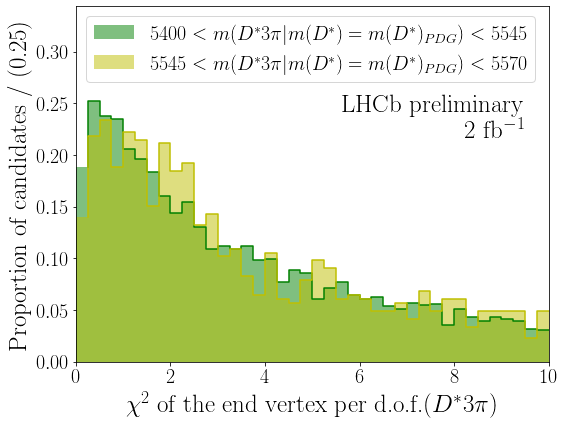

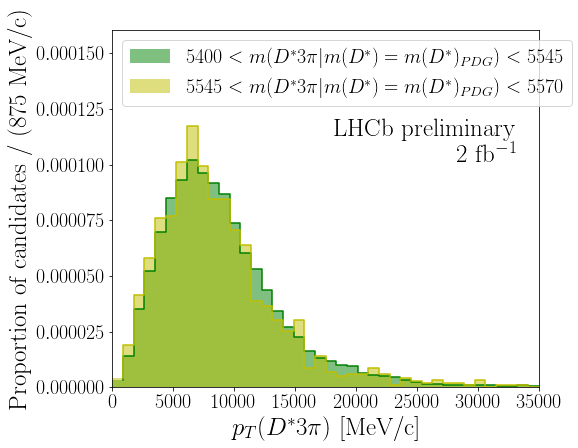

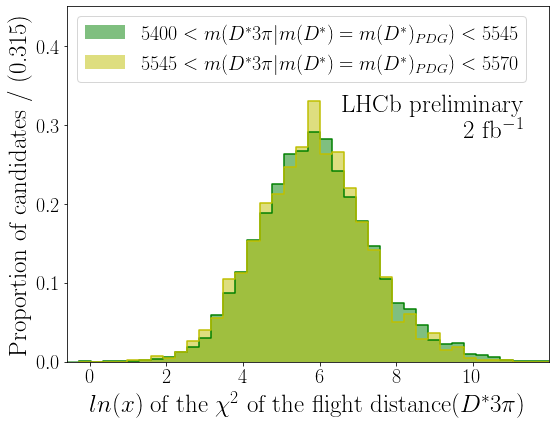

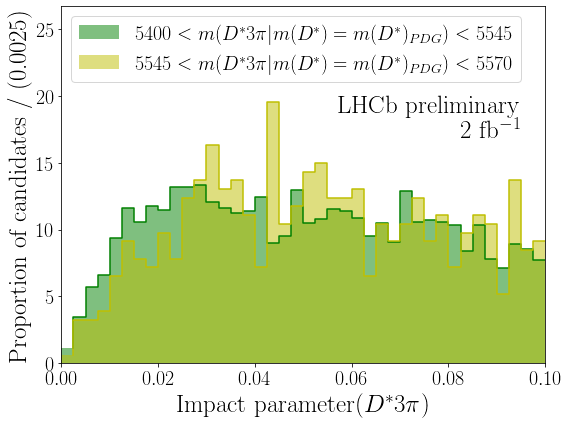

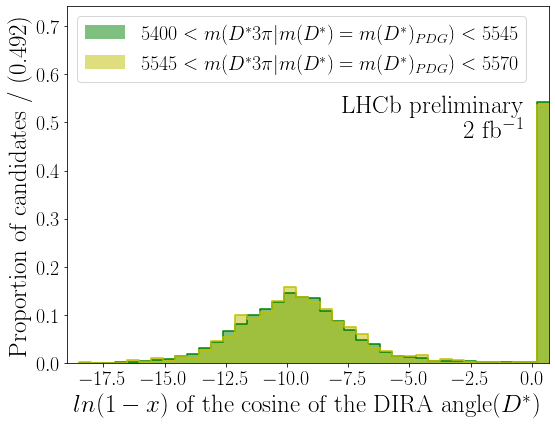

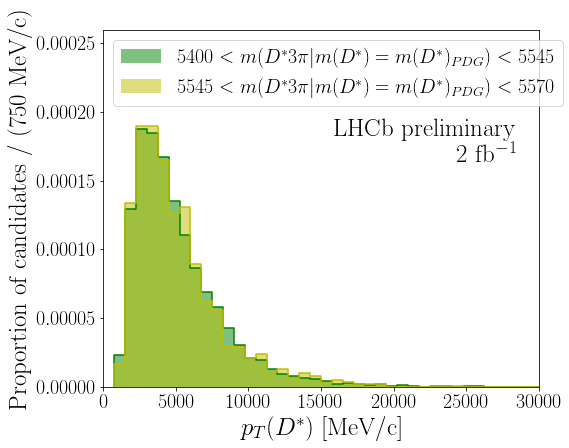

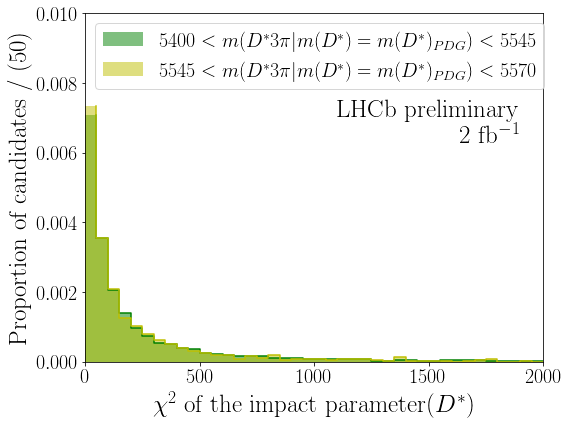

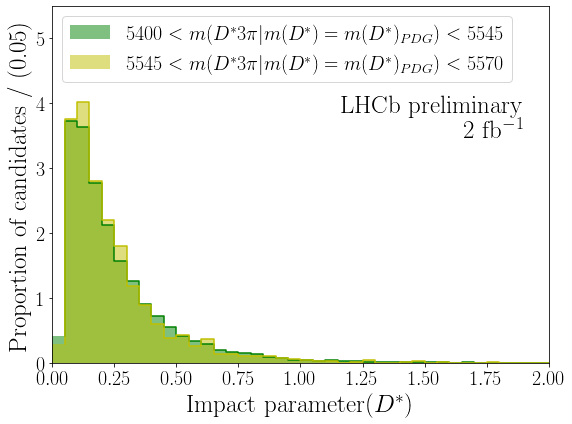

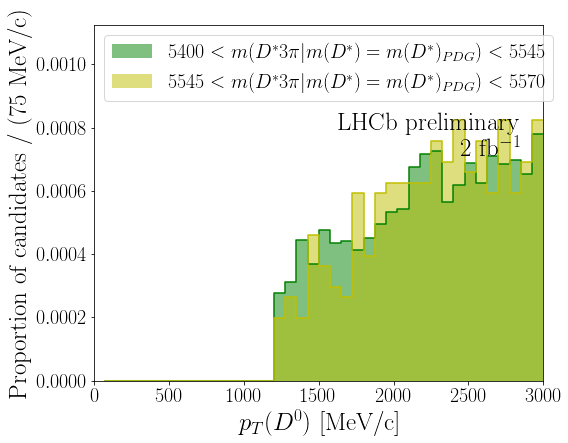

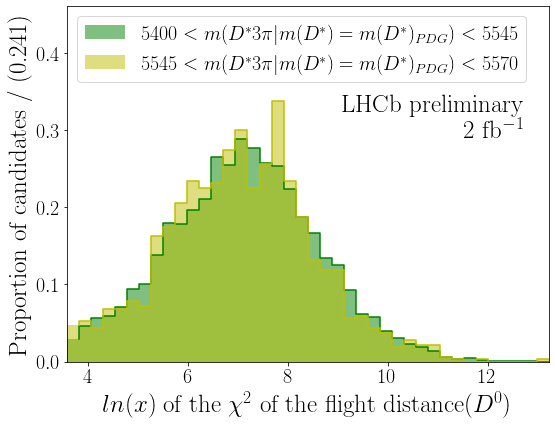

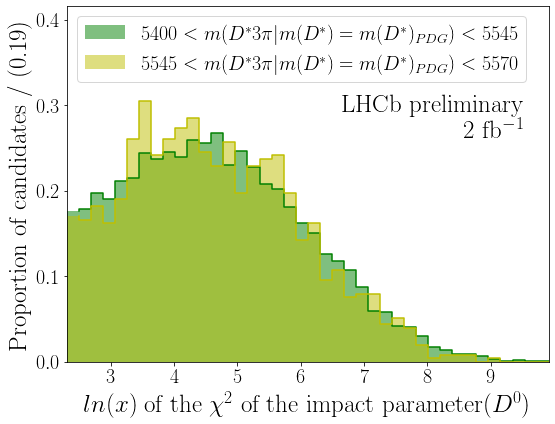

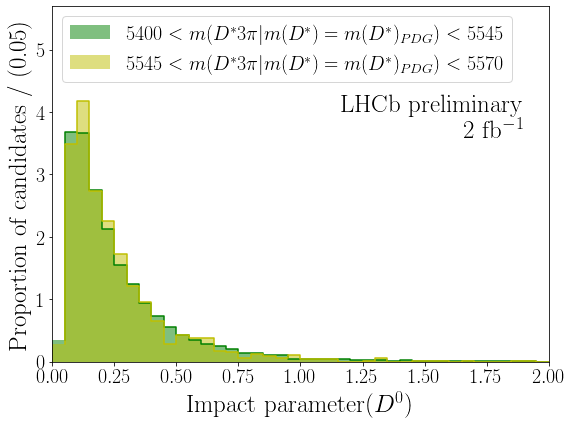

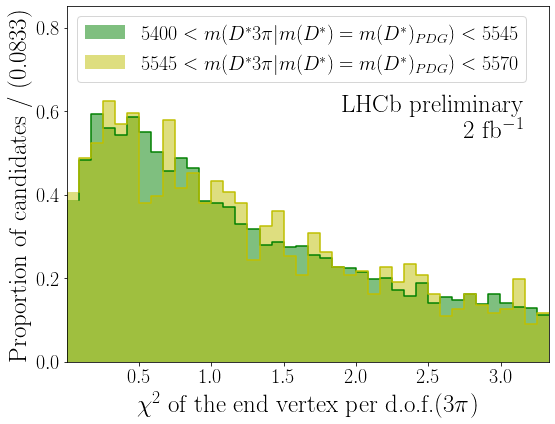

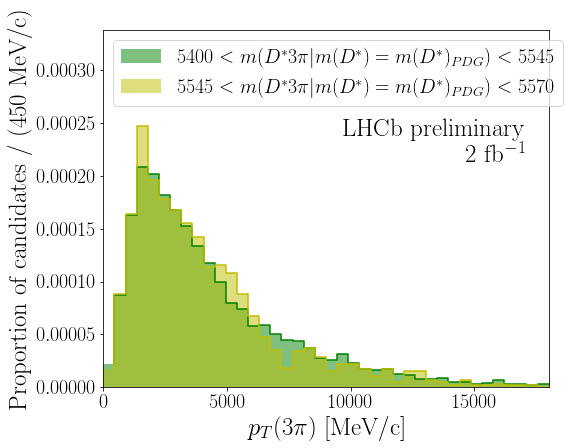

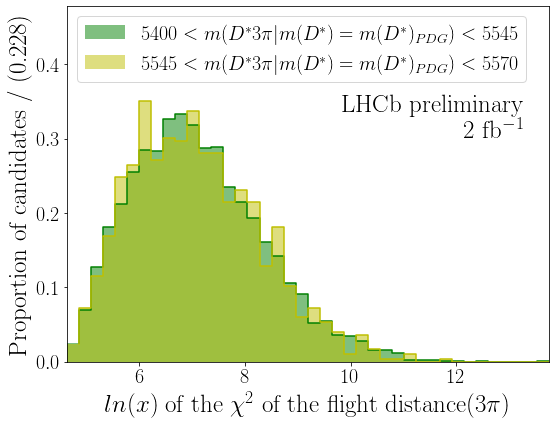

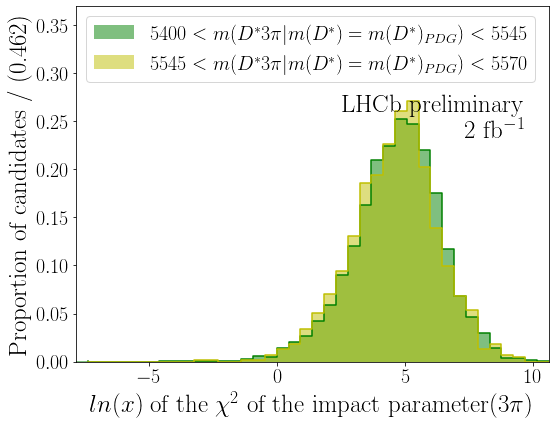

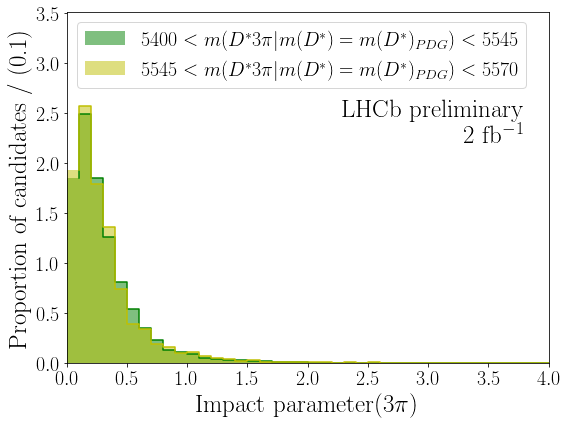

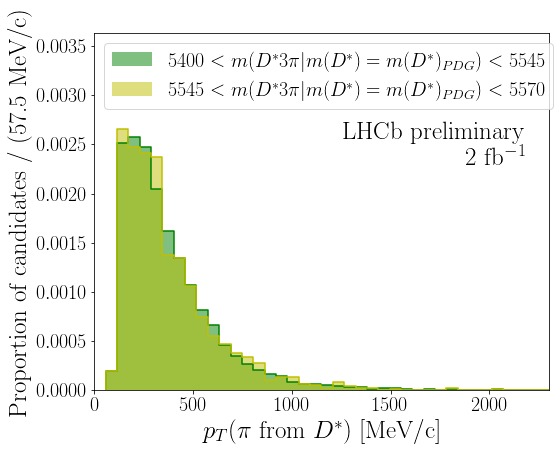

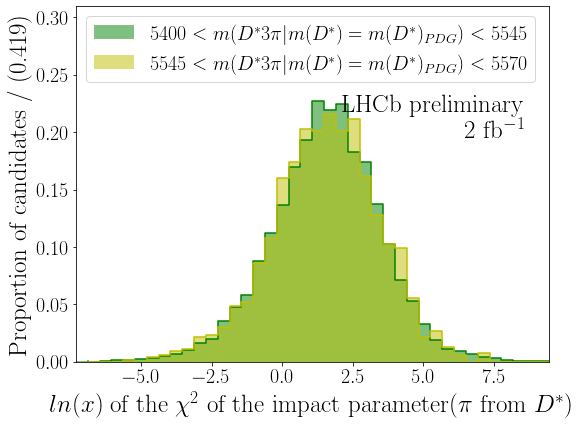

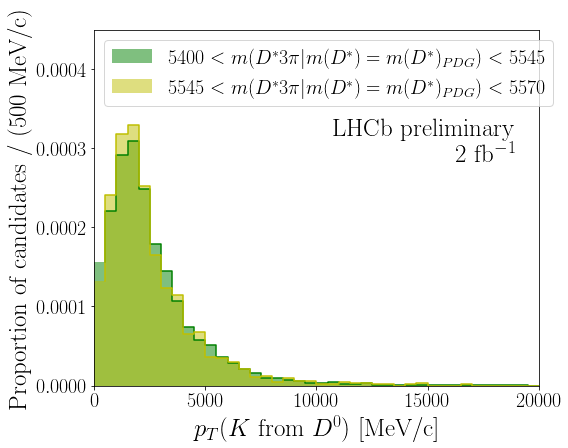

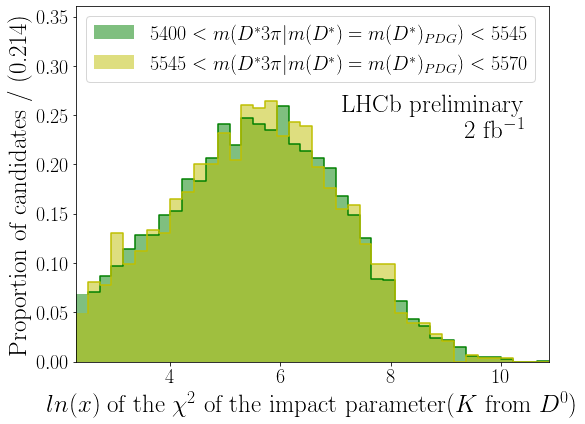

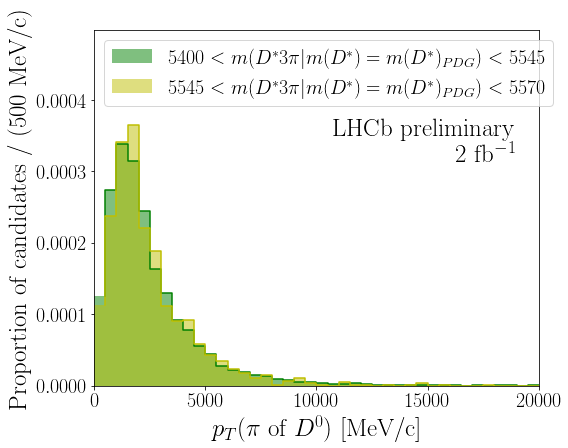

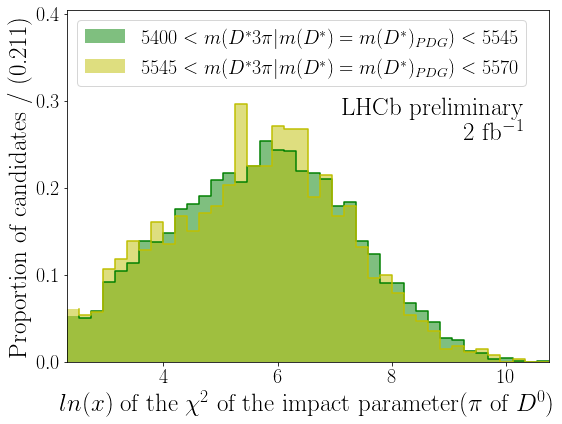

In [18]:
for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
    
    fig, ax = h.plot_hist_particle({f'${low_bkg1} < m(D^*3\pi|m(D^*)=m(D^*)_{{PDG}}) < {high_bkg1}$': df['bkg1'], 
                                    f'${low_bkg2} < m(D^*3\pi|m(D^*)=m(D^*)_{{PDG}}) < {high_bkg2}$': df['bkg2']}, variable, alpha=0.5, 
                                   n_bins=40, mode_hist = True, colors=['g', 'y'], low=low, high=high, 
                                   pos_text_LHC=[0.95, 0.75, 'right'], loc_leg = 'upper left',
                                   name_folder=f'BDT/{name_BDT}/variables',
                                   label_ncounts=False, save_fig=True)
    
    

## Correlation matrix of the training variables for the signal and background samples

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient/corr_matrix_gradient_MC
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT/gradient/corr_matrix_gradient_bkg


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'Correlations - Background'}>)

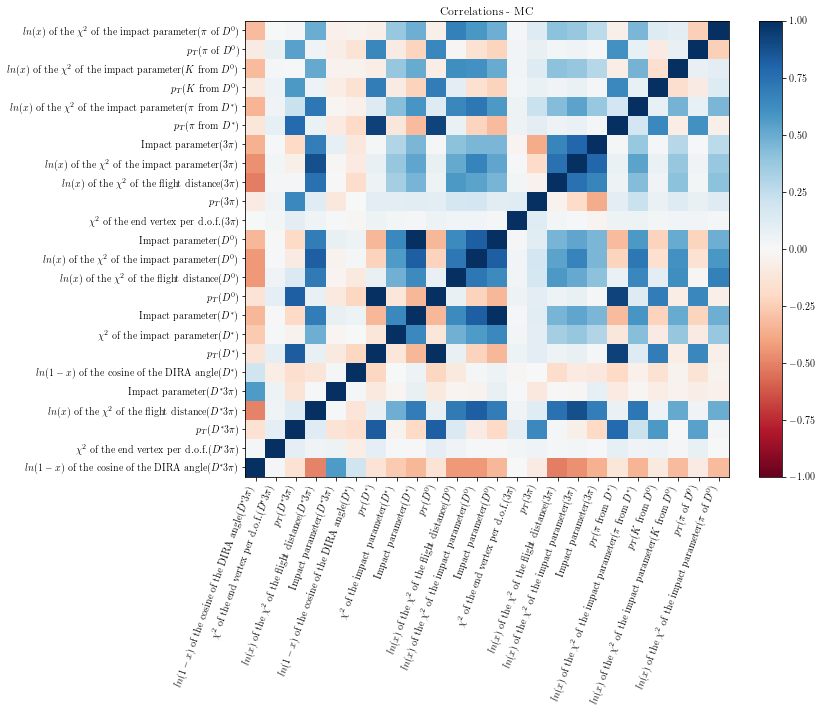

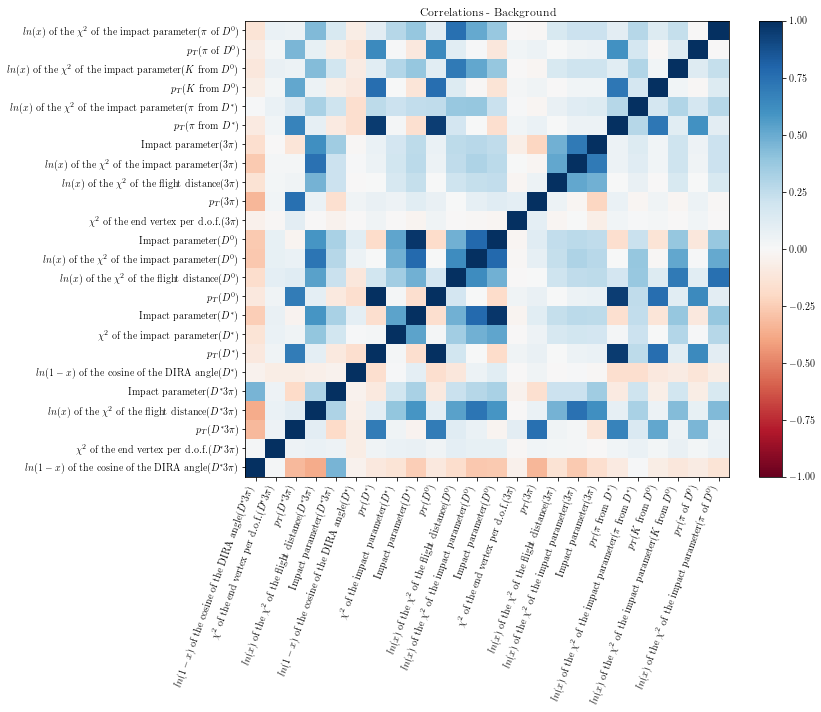

In [16]:
bt.correlations(df['training_MC'], title = 'MC', name_file=name_BDT+'_MC', name_folder=name_BDT)
bt.correlations(df['bkg'], title = 'Background', name_file=name_BDT+'_bkg', name_folder=name_BDT)